# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- **Nama:** Sofi Zamzanah
- **Email Dicoding:** zamzanahsofi@gmail.com 
- **Email Laskar:** a406xbm467@devacademy.id
- **ID Dicoding:** sofiznh

## Persiapan

### Menyiapkan library yang dibutuhkan
Sebagai langkah awal, seluruh packages atau library yang diperlukan dimuat terlebih dahulu untuk mendukung proses analisis.

In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pickle
import os

# untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# untuk preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# untuk modelling
import optuna
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from optuna.samplers import TPESampler

# untuk evaluasi model
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, classification_report, confusion_matrix

### Menyiapkan data yang akan diguankan

In [ ]:
# Import Dataset dari Dicoding GitHub Repository
dataset_url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv'

df = pd.read_csv(dataset_url, delimiter=';')
print(df)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

**Insight :** </br>
Dataset yang digunakan adalah dataset **"Students' Performance"** yang tersedia pada [GitHub](https://github.com/dicodingacademy/dicoding_dataset/tree/main/students_performance). Dataset ini dikembangkan oleh institusi pendidikan tinggi dan berasal dari penggabungan beberapa basis data yang berbeda. Dataset ini memuat informasi mengenai mahasiswa yang terdaftar di berbagai program studi sarjana, seperti agronomi, desain, pendidikan, keperawatan, jurnalisme, manajemen, layanan sosial, dan teknologi. Data yang dikumpulkan mencakup informasi yang tersedia saat awal pendaftaran—termasuk latar belakang akademik, demografi, dan kondisi sosial ekonomi mahasiswa—serta kinerja akademik mereka pada akhir semester pertama dan kedua. Dataset ini dimanfaatkan untuk membangun model klasifikasi guna memprediksi kemungkinan mahasiswa mengalami dropout atau meraih keberhasilan akademik. Penjelasan mengenai masing-masing variabel dalam dataset disajikan sebagai berikut:

* **Marital status**: Status pernikahan mahasiswa. (Kategorik)
* **Application mode**: Metode pendaftaran mahasiswa. (Kategorik)
* **Application order**: Urutan pilihan program studi saat mendaftar (0 berarti pilihan utama; 9 pilihan terakhir). (Numerik)
* **Course**: Program studi yang diambil oleh mahasiswa. (Kategorik)
* **Daytime/evening attendance**: Jadwal kehadiran kelas mahasiswa. (Kategorik) 1 – Siang, 0 – Malam
* **Previous qualification**: Kualifikasi pendidikan terakhir sebelum masuk perguruan tinggi. (Kategorik)
* **Previous qualification (grade)**: Nilai dari kualifikasi pendidikan sebelumnya (skala 0–200). (Numerik)
* **Nacionality**: Kebangsaan mahasiswa. (Kategorik)
* **Mother's qualification**: Kualifikasi pendidikan ibu mahasiswa. (Kategorik)
* **Father's qualification**: Kualifikasi pendidikan ayah mahasiswa. (Kategorik)
* **Mother's occupation**: Pekerjaan ibu mahasiswa. (Kategorik)
* **Father's occupation**: Pekerjaan ayah mahasiswa. (Kategorik)
* **Admission grade**: Nilai masuk mahasiswa saat pendaftaran (skala 0–200). (Numerik)
* **Displaced**: Apakah mahasiswa tinggal jauh dari tempat asalnya (terpaksa pindah/dipindahkan). (Kategorik) 1 – Ya, 0 – Tidak
* **Educational special needs**: Apakah mahasiswa memiliki kebutuhan pendidikan khusus. (Kategorik) 1 – Ya, 0 – Tidak
* **Debtor**: Apakah mahasiswa memiliki utang (misalnya tunggakan biaya). (Kategorik) 1 – Ya, 0 – Tidak
* **Tuition fees up to date**: Apakah pembayaran biaya kuliah mahasiswa lancar. (Kategorik) 1 – Ya, 0 – Tidak
* **Gender**: Jenis kelamin mahasiswa. (Kategorik) 1 – Laki-laki, 0 – Perempuan
* **Scholarship holder**: Apakah mahasiswa penerima beasiswa. (Kategorik) 1 – Ya, 0 – Tidak
* **Age at enrollment**: Usia mahasiswa saat mendaftar/mulai kuliah. (Numerik)
* **International**: Apakah mahasiswa adalah mahasiswa internasional. (Kategorik) 1 – Ya, 0 – Tidak
* **Curricular units 1st sem (credited)**: Jumlah mata kuliah semester 1 yang diakui dari sebelumnya (diakreditasi). (Numerik)
* **Curricular units 1st sem (enrolled)**: Jumlah mata kuliah semester 1 yang diambil/didaftarkan. (Numerik)
* **Curricular units 1st sem (evaluations)**: Jumlah mata kuliah semester 1 yang telah dinilai/dievaluasi. (Numerik)
* **Curricular units 1st sem (approved)**: Jumlah mata kuliah semester 1 yang lulus/berhasil disetujui. (Numerik)

## Data Understanding

### Ringkasan Statistik

In [7]:
ringkasanStatistik = df.describe(include='all')
print(ringkasanStatistik)

        Marital_status  Application_mode  Application_order       Course  \
count      4424.000000       4424.000000        4424.000000  4424.000000   
unique             NaN               NaN                NaN          NaN   
top                NaN               NaN                NaN          NaN   
freq               NaN               NaN                NaN          NaN   
mean          1.178571         18.669078           1.727848  8856.642631   
std           0.605747         17.484682           1.313793  2063.566416   
min           1.000000          1.000000           0.000000    33.000000   
25%           1.000000          1.000000           1.000000  9085.000000   
50%           1.000000         17.000000           1.000000  9238.000000   
75%           1.000000         39.000000           2.000000  9556.000000   
max           6.000000         57.000000           9.000000  9991.000000   

        Daytime_evening_attendance  Previous_qualification  \
count                  44

**Insight:** </br>
Tahap ini menyajikan ringkasan awal serta statistik deskriptif dari dataset guna memberikan gambaran umum mengenai data yang digunakan. Dari hasil ringkasan tersebut, terlihat bahwa banyak variabel yang tersaji dalam bentuk numerik (encoded), padahal sebenarnya merupakan data kategorikal. Oleh karena itu, pada tahap Data Preprocessing, diperlukan proses decoding agar data dapat digunakan secara optimal dalam pembuatan dashboard.

### Pengecekan data duplikat

In [8]:
duplicate_count = df.duplicated().sum()
print(f"Jumlah duplikat pada data: {duplicate_count}")

if duplicate_count > 0:
    print("Baris yang duplikat:")
    print(df[df.duplicated()])

Jumlah duplikat pada data: 0


**Insight :** </br>
Berdasarkan output tersebut terlihat bahwa tidak ada baris yang duplikat pada dataset yang digunakan sehingga tidak diperlukan penghapusan baris duplikat menggunakan drop_duplicates().

### Pengecekan missing value

In [9]:
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


**Insight:** </br>
Berdasarkan output tersebut terlihat bahwa tidak ada missing value pada dataset sehingga tidak diperlukan penanganan lebih lanjut terkait missing value.

### Exploratory Data Analysis

Dilakukan pemisahan kolom numerik dan kategorik dalam dataset agar bisa diproses dengan cara yang sesuai

In [10]:
numerical, categorical = [], []

for feature in df.columns:
    if df[feature].dtype != 'object':
        numerical.append(feature)
    else:
        categorical.append(feature)

#### 1. Visualisasi variabel

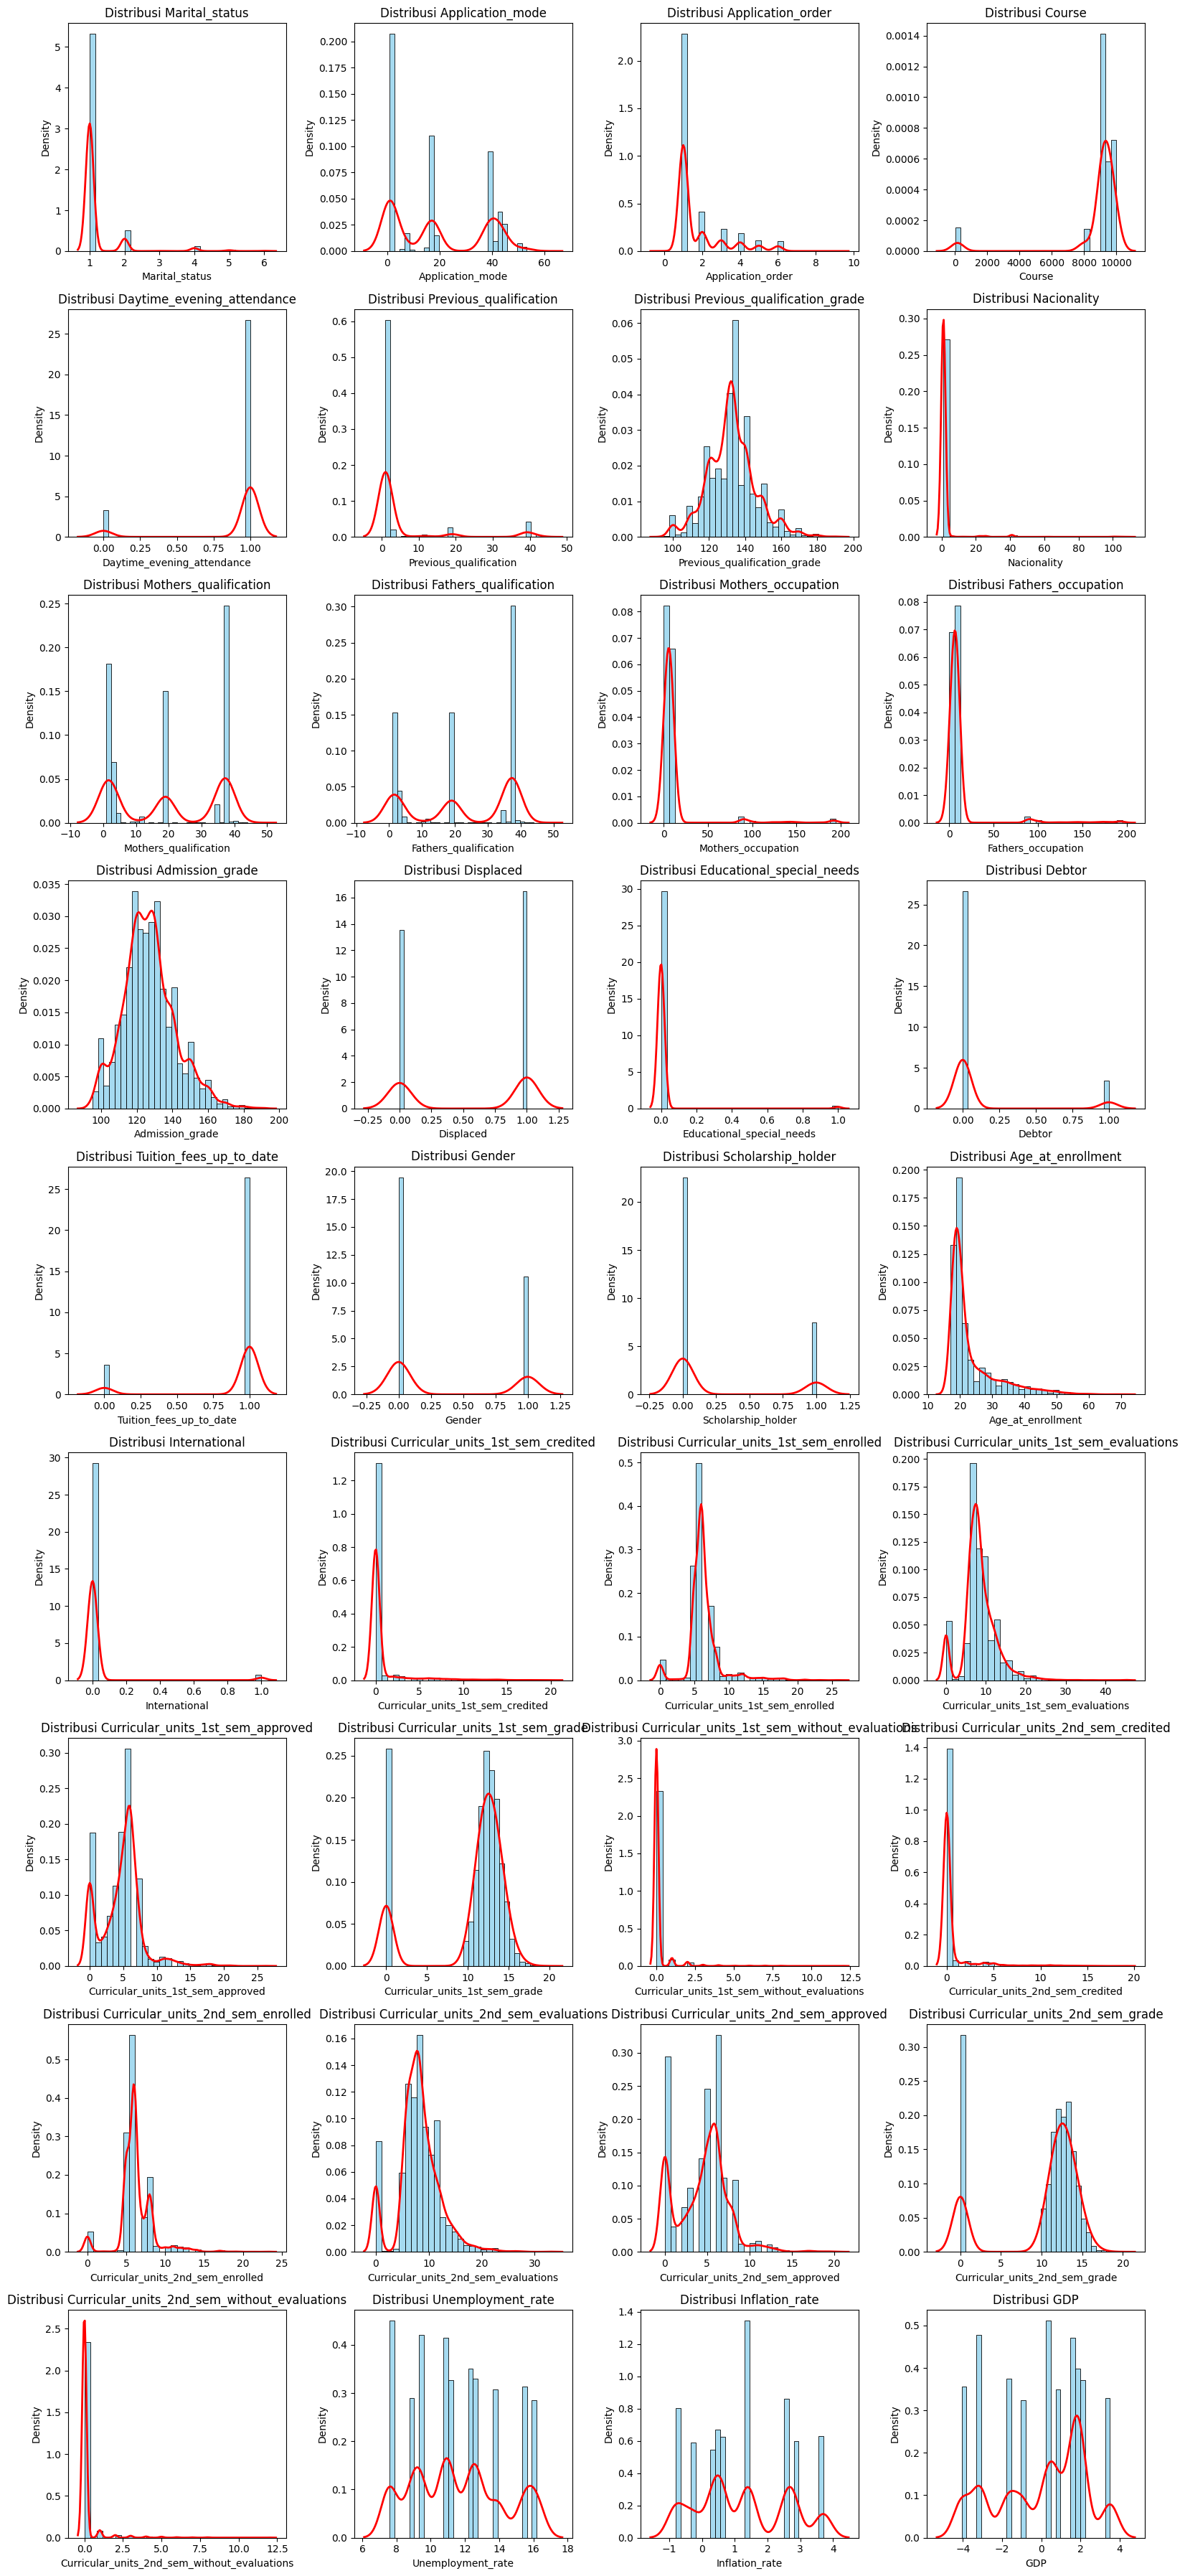

In [11]:
num_cols = df[numerical].columns
n_cols = len(num_cols)

n_per_row = 4
n_rows = int(np.ceil(n_cols / n_per_row))

# Buat figure dan axes
fig, axes = plt.subplots(n_rows, n_per_row, figsize=(n_per_row * 4, n_rows * 4))

# Pastikan axes dalam bentuk 1D array
axes = axes.flatten()

# Loop untuk plotting histogram + KDE
for idx, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axes[idx], color='skyblue', stat='density', bins=30)
    sns.kdeplot(df[col], ax=axes[idx], color='red', linewidth=2)
    axes[idx].set_title(f'Distribusi {col}')

# Hapus subplot kosong jika ada
for k in range(n_cols, len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()

**Insight :** </br>

Tahap ini menampilkan visualisasi histogram dari seluruh variabel dalam dataset untuk memahami **karakteristik distribusi** masing-masing fitur, baik numerik maupun kategorikal.

1. **Variabel Kategorikal (Diskrit):**

   * Variabel seperti `Marital_status`, `Application_mode`, `Course`, `Nationality`, `Mothers_qualification`, dan `Fathers_qualification` menunjukkan distribusi **diskrit** dengan jumlah kategori terbatas.
   * Distribusi tidak merata; terdapat dominasi pada kategori tertentu, misalnya pada `Gender`, sebagian besar mahasiswa berjenis kelamin tertentu (didominasi oleh nilai 1).

2. **Variabel Numerik:**

   * Variabel `Admission_grade`, `Age_at_enrollment`, dan `curricular_units_*` memiliki **distribusi miring ke kanan (right-skewed)**, memiliki arti terdaapt outlier atau rentang nilai yang lebar.
   * Variabel`Admission_grade` dan `Previous_qualification_grade` cenderung berdistribusi normal atau mendekati normal.
   * Variabel `GPA` tidak tersedia secara eksplisit, namun `Admission_grade` dapat menjadi proksi yang menggambarkan kemampuan awal mahasiswa.

3. **Variabel Biner:**

   * Variabel `Debtor`, `Scholarship_holder`, `Displaced`, `Educational_special_needs`, `Tuition_fees_up_to_date`, dan `International` merupakan fitur biner (0/1).
   * Hampir semua fitur biner memiliki distribusi yang sangat **tidak seimbang**.

4. **Kondisi Ekonomi Makro:**

   * Variabel `Unemployment_rate`, `Inflation_rate`, dan `GDP` menunjukkan **variasi yang lebih halus**, mencerminkan perubahan dari waktu ke waktu. Ketiganya menunjukkan bahwa data mencakup mahasiswa dari tahun akademik yang berbeda.

#### 2. Visualisasi kolom target

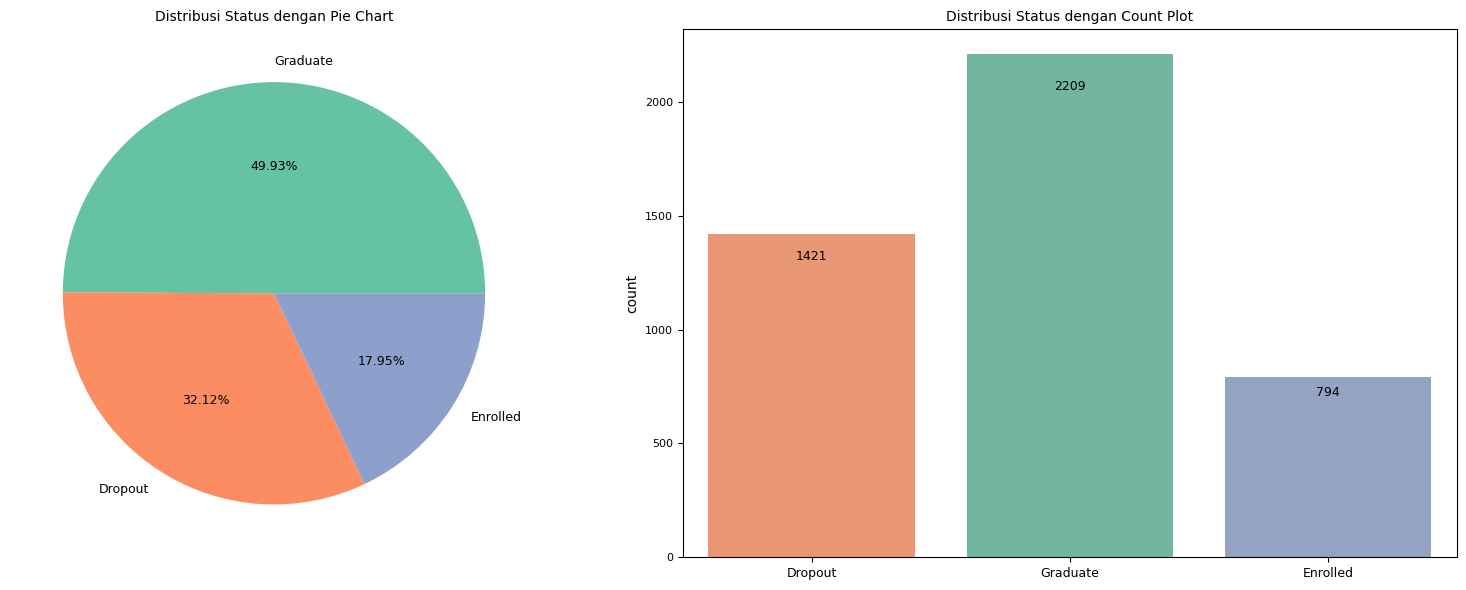

In [12]:
col = 'Status'
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Hitung frekuensi nilai unik dari kolom target
tdf = df[col].value_counts().reset_index()
tdf.columns = [col, 'count']

# Buat palet warna berdasarkan jumlah kategori unik
unique_classes = tdf[col].tolist()
palette = sns.color_palette("Set2", len(unique_classes))  # atau coba 'tab10', 'Pastel1', dsb
color_map = dict(zip(unique_classes, palette))
colors = [color_map[cat] for cat in tdf[col]]

# Pie chart
ax[0].pie(tdf['count'], labels=tdf[col], autopct='%.2f%%', colors=colors, textprops={'fontsize': 9})
ax[0].set_title('Distribusi Status dengan Pie Chart', fontsize=10)
ax[0].set_aspect('equal')

# Countplot dengan warna sesuai kategori
sns.countplot(data=df, x=col, ax=ax[1], palette=color_map)
ax[1].set_title('Distribusi Status dengan Count Plot', fontsize=10)
ax[1].set_xlabel('')
ax[1].tick_params(axis='y', labelsize=8)
ax[1].tick_params(axis='x', labelsize=9)

# Tambahkan label jumlah di atas bar
for bar in ax[1].patches:
    height = bar.get_height()
    ax[1].annotate(
        f'{int(height)}',
        (bar.get_x() + bar.get_width() / 2, height - height * 0.05),
        ha='center', va='top', fontsize=9, color='black'
    )

plt.tight_layout()
plt.show()

**Insight :** </br>
Pada tahap ini dilakukan proses eksplorasi data untuk memahami distribusi dari variabel target, yaitu status mahasiswa. Melalui visualisasi berupa diagram pie dan bar, dapat diketahui bahwa sebagian besar mahasiswa berada pada kategori "Graduate" dengan proporsi mencapai 49,93% dari seluruh data. Diikuti oleh kategori "Dropout" yang mencakup sekitar 32,12%, sedangkan kategori "Enrolled" merupakan kelompok dengan jumlah paling sedikit, yaitu sebesar 16,92%.

Pola distribusi ini mengindikasikan adanya ketimpangan jumlah antar kelas (class imbalance) pada variabel target. Dalam kondisi seperti ini, penting untuk memilih metrik evaluasi yang sesuai karena penggunaan metrik seperti akurasi saja dapat menghasilkan interpretasi yang kurang tepat. Oleh karena itu, analisis ini mengandalkan metrik yang lebih mencerminkan kinerja model terhadap seluruh kelas, khususnya kelas minoritas, seperti F1-score dan Balanced Accuracy. Kedua metrik ini mampu memberikan penilaian yang lebih seimbang terhadap kemampuan model dalam mengklasifikasikan kategori dengan jumlah data yang lebih sedikit, yang menjadi perhatian utama dalam studi ini.

## Data Preparation / Preprocessing

### Dataset untuk Dashboard


Untuk keperluan pembuatan dashboard, perlu dilakukan label decoding untuk fitur-fitur dibawah ini:

| Features | 0 | 1 | 2 | 3 | 4 | 5 | 6 |
|----------|---|---|---|---|---|---|---|
| **Marital_status** | - | Single | Married | Widower | Divorced | Facto Union | Legally Seperated |
| **Daytime_evening_attendance** | Evening | Daytime | - | - | - | - | - |
| **Displaced** | No | Yes | - | - | - | - | - |
| **Educational_special_needs** | No | Yes | - | - | - | - | - |
| **Debtor** | No | Yes | - | - | - | - | - |
| **Tuition_fees_up_to_date** | No | Yes | - | - | - | - | - |
| **Gender** | Female | Male | - | - | - | - | - |
| **Scholarship_holder** | No | Yes | - | - | - | - | - |
| **International** | No | Yes | - | - | - | - | - |

<br>

<details>
<summary><b>Application_mode</b></summary>
1 - 1st Phase - General Contingent<br>
2 - Ordinance No. 612/93<br>
5 - 1st Phase - Special Contingent (Azores Island)<br>
7 - Holders of Other Higher Courses<br>
10 - Ordinance No. 854-B/99<br>
15 - International Student (Bachelor)<br>
16 - 1st phase - Special Contingent (Madeira Island)<br>
17 - 2nd phase - General Contingent<br>
18 - 3rd phase - General Contingent<br>
26 - Ordinance No. 533-A/99, Item B2 (Different Plan)<br>
27 - Ordinance No. 533-A/99, Item B3 (Other Institution)<br>
39 - Over 23 Years Old<br>
42 - Transfer<br>
43 - Change of Course<br>
44 - Technological Specialization Diploma Holders<br>
51 - Change of Institution/Course<br>
53 - Short Cycle Diploma Holders<br>
57 - Change of Institution/Course (International)<br>
</details>

<br>

<details>
<summary><b>Course</b></summary>
33 - Biofuel Production Technologies<br>
171 - Animation and Multimedia Design<br>
8014 - Social Service (Evening Attendance)<br>
9003 - Agronomy<br>
9070 - Communication Design<br>
9085 - Veterinary Nursing<br>
9119 - Informatics Engineering<br>
9130 - Equinculture<br>
9147 - Management<br>
9238 - Social Service<br>
9254 - Tourism<br>
9500 - Nursing<br>
9556 - Oral Hygiene<br>
9670 - Advertising and Marketing Management<br>
9773 - Journalism and Communication<br>
9853 - Basic Education<br>
9991 - Management (Evening Attendance)<br>
</details>

<br>

<details>
<summary><b>Previous_qualification</b></summary>
1 - Secondary Education<br>
2 - Higher Education - Bachelor's Degree<br>
3 - Higher Education - Degree<br>
4 - Higher Education - Master's<br>
5 - Higher Education - Doctorate<br>
6 - Frequency of Higher Education<br>
9 - 12th Year of Schooling - Not Completed<br>
10 - 11th Year of Schooling - Not Completed<br>
12 - Other - 11th Year of Schooling<br>
14 - 10th Year of Schooling<br>
15 - 10th Year of Schooling - Not Completed<br>
19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.<br>
38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.<br>
39 - Technological Specialization Course<br>
40 - Higher Education - Degree (1st Cycle)<br>
42 - Professional Higher Technical Course<br>
43 - Higher Education - Master (2nd Cycle)<br>
</details>

<br>

<details>
<summary><b>Nacionality</b></summary>
1 - Portuguese<br>
2 - German<br>
6 - Spanish<br>
11 - Italian<br>
13 - Dutch<br>
14 - English<br>
17 - Lithuanian<br>
21 - Angolan<br>
22 - Cape Verdean<br>
24 - Guinean<br>
25 - Mozambican<br>
26 - Santomean<br>
32 - Turkish<br>
41 - Brazilian<br>
62 - Romanian<br>
100 - Moldova (Republic of)<br>
101 - Mexican<br>
103 - Ukrainian<br>
105 - Russian<br>
108 - Cuban<br>
109 - Colombian<br>
</details>

<br>

<details>
<summary><b>Mothers_qualification & Fathers_qualification</b></summary>
1 - Secondary Education - 12th Year of Schooling or Eq.<br>
2 - Higher Education - Bachelor's Degree<br>
3 - Higher Education - Degree<br>
4 - Higher Education - Master's<br>
5 - Higher Education - Doctorate<br>
6 - Frequency of Higher Education<br>
9 - 12th Year of Schooling - Not Completed<br>
10 - 11th Year of Schooling - Not Completed<br>
11 - 7th Year (Old)<br>
12 - Other - 11th Year of Schooling<br>
13 - 2nd Year Complementary High School Course<br>
14 - 10th Year of Schooling<br>
18 - General Commerce Course<br>
19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.<br>
20 - Complementary High School Course<br>
22 - Technical - Professional Course<br>
25 - Complementary High School Course - Not Concluded<br>
26 - 7th Year of Schooling<br>
27 - 2nd Cycle of the General High School Course<br>
29 - 9th Year of Schooling - Not Completed<br>
30 - 8th Year of Schooling<br>
31 - General Course of Administration and Commerce<br>
33 - Supplementary Accounting and Administration<br>
34 - Unknown<br>
35 - Can't Read or Write<br>
36 - Can Read Without Having a 4th Year of Schooling<br>
37 - Basic Education 1st Cycle (4th/5th Year) or Equiv.<br>
38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.<br>
39 - Technological Specialization Course<br>
40 - Higher Education - Degree (1st Cycle)<br>
41 - Specialized Higher Studies Course<br>
42 - Professional Higher Technical Course<br>
43 - Higher Education - Master (2nd Cycle)<br>
44 - Higher Education - Doctorate (3rd Cycle)<br>
</details>

<br>

<details>
<summary><b>Mothers_occupation & Fathers_occupation</b></summary>
0 - Student<br>
1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers<br>
2 - Specialists in Intellectual and Scientific Activities<br>
3 - Intermediate Level Technicians and Professions<br>
4 - Administrative Staff<br>
5 - Personal Services, Security and Safety Workers and Sellers<br>
6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry<br>
7 - Skilled Workers in Industry, Construction and Craftsmen<br>
8 - Installation and Machine Operators and Assembly Workers<br>
9 - Unskilled Workers<br>
10 - Armed Forces Professions<br>
90 - Other Situation<br>
99 - (Blank)<br>
101 - Armed Forces Officers<br>
102 - Armed Forces Sergeants<br>
103 - Other Armed Forces Personnel<br>
112 - Directors of Administrative and Commercial Services<br>
114 - Hotel, Catering, Trade and Other Services Directors<br>
121 - Specialists in the Physical Sciences, Mathematics, Engineering and Related Techniques<br>
122 - Health Professionals<br>
123 - Teachers<br>
124 - Specialists in Finance, Accounting, Administrative Organization, Public and Commercial Relations<br>
125 - Specialists in Information and Communication Technologies (ICT)<br>
131 - Intermediate Level Science and Engineering Technicians and Professions<br>
132 - Technicians and Professionals, of Intermediate Level of Health<br>
134 - Intermediate Level Technicians From Legal, Social, Sports, Cultural and Similar Services<br>
135 - Information and Communication Technology Technicians<br>
141 - Office Workers, Secretaries in General and Data Processing Operators<br>
143 - Data, Accounting, Statistical, Financial Services and Registry-Related Operators<br>
144 - Other Administrative Support Staff<br>
151 - Personal Service Workers<br>
152 - Sellers<br>
153 - Personal Care Workers and the Like<br>
154 - Protection and Security Services Personnel<br>
161 - Market-Oriented Farmers and Skilled Agricultural and Animal Production Workers<br>
163 - Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, Subsistence<br>
171 - Skilled Construction Workers and the Like, Except Electricians<br>
172 - Skilled Workers in Metallurgy, Metalworking and Similar<br>
173 - Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans and the Like<br>
174 - Skilled Workers in Electricity and Electronics<br>
175 - Workers in Food Processing, Woodworking, Clothing and Other Industries and Crafts<br>
181 - Fixed Plant and Machine Operators<br>
182 - Assembly Workers<br>
183 - Vehicle Drivers and Mobile Equipment Operators<br>
191 - Cleaning Workers<br>
192 - Unskilled Workers in Agriculture, Animal Production, Fisheries and Forestry<br>
193 - Unskilled Workers in Extractive Industry, Construction, Manufacturing and Transport<br>
194 - Meal Preparation Assistants<br>
195 - Street Vendors (Except Food) and Street Service Providers<br>
</details>

In [13]:
def label_decoding(df, feature):
    category_mappings = {
        'Marital_status': {1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced',
                           5: 'Facto Union', 6: 'Legally Seperated'},
        'Daytime_evening_attendance': {0: 'Evening', 1: 'Daytime'},
        'Gender': {0: 'Female', 1: 'Male'},
        'Application_mode' : {
            1: '1st Phase - General Contingent',
            2: 'Ordinance No. 612/93',
            5: '1st Phase - Special Contingent (Azores Island)',
            7: 'Holders of Other Higher Courses',
            10: 'Ordinance No. 854-B/99',
            15: 'International Student (Bachelor)',
            16: '1st Phase - Special Contingent (Madeira Island)',
            17: '2nd Phase - General Contingent',
            18: '3rd Phase - General Contingent',
            26: 'Ordinance No. 533-A/99, Item B2 (Different Plan)',
            27: 'Ordinance No. 533-A/99, Item B3 (Other Institution)',
            39: 'Over 23 Years Old',
            42: 'Transfer',
            43: 'Change of Course',
            44: 'Technological Specialization Diploma Holders',
            51: 'Change of Institution/Course',
            53: 'Short Cycle Diploma Holders',
            57: 'Change of Institution/Course (International)'
        },
        'Course': {
            33: 'Biofuel Production Technologies',
            171: 'Animation and Multimedia Design',
            8014: 'Social Service (Evening Attendance)',
            9003: 'Agronomy',
            9070: 'Communication Design',
            9085: 'Veterinary Nursing',
            9119: 'Informatics Engineering',
            9130: 'Equinculture',
            9147: 'Management',
            9238: 'Social Service',
            9254: 'Tourism',
            9500: 'Nursing',
            9556: 'Oral Hygiene',
            9670: 'Advertising and Marketing Management',
            9773: 'Journalism and Communication',
            9853: 'Basic Education',
            9991: 'Management (Evening Attendance)'
        },
        'Nacionality': {
            1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian',
            13: 'Dutch', 14: 'English', 17: 'Lithuanian', 21: 'Angolan',
            22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican',
            26: 'Santomean', 32: 'Turkish', 41: 'Brazilian', 62: 'Romanian',
            100: 'Moldova (Republic of)', 101: 'Mexican', 103: 'Ukrainian',
            105: 'Russian', 108: 'Cuban', 109: 'Colombian'
        },
        'Qualification': {
            1: 'Secondary Education - 12th Year of Schooling or Eq.',
            2: "Higher Education - Bachelor's Degree",
            3: 'Higher Education - Degree',
            4: "Higher Education - Master's",
            5: 'Higher Education - Doctorate',
            6: 'Frequency of Higher Education',
            9: '12th Year of Schooling - Not Completed',
            10: '11th Year of Schooling - Not Completed',
            11: '7th Year (Old)',
            12: 'Other - 11th Year of Schooling',
            13: '2nd Year Complementary High School Course',
            14: '10th Year of Schooling',
            15: '10th Year of Schooling - Not Completed',
            18: 'General Commerce Course',
            19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
            20: 'Complementary High School Course',
            22: 'Technical - Professional Course',
            25: 'Complementary High School Course - Not Concluded',
            26: '7th Year of Schooling',
            27: '2nd Cycle of the General High School Course',
            29: '9th Year of Schooling - Not Completed',
            30: '8th Year of Schooling',
            31: 'General Course of Administration and Commerce',
            33: 'Supplementary Accounting and Administration',
            34: 'Unknown',
            35: "Can't Read or Write",
            36: 'Can Read Without Having a 4th Year of Schooling',
            37: 'Basic Education 1st Cycle (4th/5th Year) or Equiv.',
            38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
            39: 'Technological Specialization Course',
            40: 'Higher Education - Degree (1st Cycle)',
            41: 'Specialized Higher Studies Course',
            42: 'Professional Higher Technical Course',
            43: 'Higher Education - Master (2nd Cycle)',
            44: 'Higher Education - Doctorate (3rd Cycle)'
        },
        'Occupation': {
            0: 'Student',
            1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
            2: 'Specialists in Intellectual and Scientific Activities',
            3: 'Intermediate Level Technicians and Professions',
            4: 'Administrative Staff',
            5: 'Personal Services, Security and Safety Workers and Sellers',
            6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
            7: 'Skilled Workers in Industry, Construction and Craftsmen',
            8: 'Installation and Machine Operators and Assembly Workers',
            9: 'Unskilled Workers',
            10: 'Armed Forces Professions',
            90: 'Other Situation',
            99: '(Blank)',
            101: 'Armed Forces Officers',
            102: 'Armed Forces Sergeants',
            103: 'Other Armed Forces Personnel',
            112: 'Directors of Administrative and Commercial Services',
            114: 'Hotel, Catering, Trade and Other Services Directors',
            121: 'Specialists in the Physical Sciences, Mathematics, Engineering and Related Techniques',
            122: 'Health Professionals',
            123: 'Teachers',
            124: 'Specialists in Finance, Accounting, Administrative Organization, Public and Commercial Relations',
            125: 'Specialists in Information and Communication Technologies (ICT)',
            131: 'Intermediate Level Science and Engineering Technicians and Professions',
            132: 'Technicians and Professionals, of Intermediate Level of Health',
            134: 'Intermediate Level Technicians From Legal, Social, Sports, Cultural and Similar Services',
            135: 'Information and Communication Technology Technicians',
            141: 'Office Workers, Secretaries in General and Data Processing Operators',
            143: 'Data, Accounting, Statistical, Financial Services and Registry-Related Operators',
            144: 'Other Administrative Support Staff',
            151: 'Personal Service Workers',
            152: 'Sellers',
            153: 'Personal Care Workers and the Like',
            154: 'Protection and Security Services Personnel',
            161: 'Market-Oriented Farmers and Skilled Agricultural and Animal Production Workers',
            163: 'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, Subsistence',
            171: 'Skilled Construction Workers and the Like, Except Electricians',
            172: 'Skilled Workers in Metallurgy, Metalworking and Similar',
            173: 'Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans and the Like',
            174: 'Skilled Workers in Electricity and Electronics',
            175: 'Workers in Food Processing, Woodworking, Clothing and Other Industries and Crafts',
            181: 'Fixed Plant and Machine Operators',
            182: 'Assembly Workers',
            183: 'Vehicle Drivers and Mobile Equipment Operators',
            191: 'Cleaning Workers',
            192: 'Unskilled Workers in Agriculture, Animal Production, Fisheries and Forestry',
            193: 'Unskilled Workers in Extractive Industry, Construction, Manufacturing and Transport',
            194: 'Meal Preparation Assistants',
            195: 'Street Vendors (Except Food) and Street Service Providers'
        }
    }

    category_mappings['Previous_qualification'] = category_mappings['Qualification']
    category_mappings['Mothers_qualification'] = category_mappings['Qualification']
    category_mappings['Fathers_qualification'] = category_mappings['Qualification']
    category_mappings['Mothers_occupation'] = category_mappings['Occupation']
    category_mappings['Fathers_occupation'] = category_mappings['Occupation']

    binary_features = ['Displaced', 'Educational_special_needs', 'Debtor',
                       'Tuition_fees_up_to_date', 'Scholarship_holder',
                       'International']
    binary_mapping = {0: 'No', 1: 'Yes'}

    features = [feature] if isinstance(feature, str) else feature

    for f in features:
        if f in category_mappings:
            df[f] = df[f].map(category_mappings[f])
        elif f in binary_features:
            df[f] = df[f].map(binary_mapping)

    return df

In [14]:
df_dashboard = df.copy()

df_dashboard = label_decoding(df_dashboard, ['Marital_status', 'Application_mode', 'Course',
                                 'Daytime_evening_attendance',
                                 'Previous_qualification', 'Nacionality',
                                 'Mothers_qualification', 'Fathers_qualification',
                                 'Mothers_occupation', 'Fathers_occupation',
                                 'Displaced', 'Educational_special_needs' ,
                                 'Debtor', 'Tuition_fees_up_to_date', 'Gender',
                                 'Scholarship_holder', 'International'])

# Simpan dalam csv agar bisa digunakan nantinya
df_dashboard.to_csv('data_dashboard.csv', index=False)

### Encoding Variabel Kategorik

Untuk keperluan modelling, variabel target "Status" perlu dilakukan encoding menggunakan Label Encoder

In [15]:
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

dict(zip(le.classes_, le.transform(le.classes_)))

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}

Mahasiswa dengan status "enrolled" dihapus dari dataset untuk menyederhanakan model menjadi klasifikasi biner dan menyesuaikan fokus analisis pada kasus dropout.

In [16]:
df = df[df['Status'] != 1]
df = df.reset_index(drop=True)

df.loc[:, 'Status'] = df['Status'].replace({2: 1})
print(df)

      Marital_status  Application_mode  Application_order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
3625               1                 1                  6    9773   
3626               1                 1                  2    9773   
3627               1                 1                  1    9500   
3628               1                 1                  1    9147   
3629               1                10                  1    9773   

      Daytime_evening_attendance  Previous_qualification  \
0                              1                       1   
1                              1                   

In [17]:
df['Status'].value_counts()

Status
1    2209
0    1421
Name: count, dtype: int64

**Insight :**

Dalam proses pemodelan yang akan dilakukan, fitur label yang digunakan adalah Status, yaitu menunjukkan apakah seorang siswa berstatus graduated atau dropout.

### Feature Selection

Feature Selection dilakukan berdasarkan korelasi fitur terhadap varibel target ```Status``` 

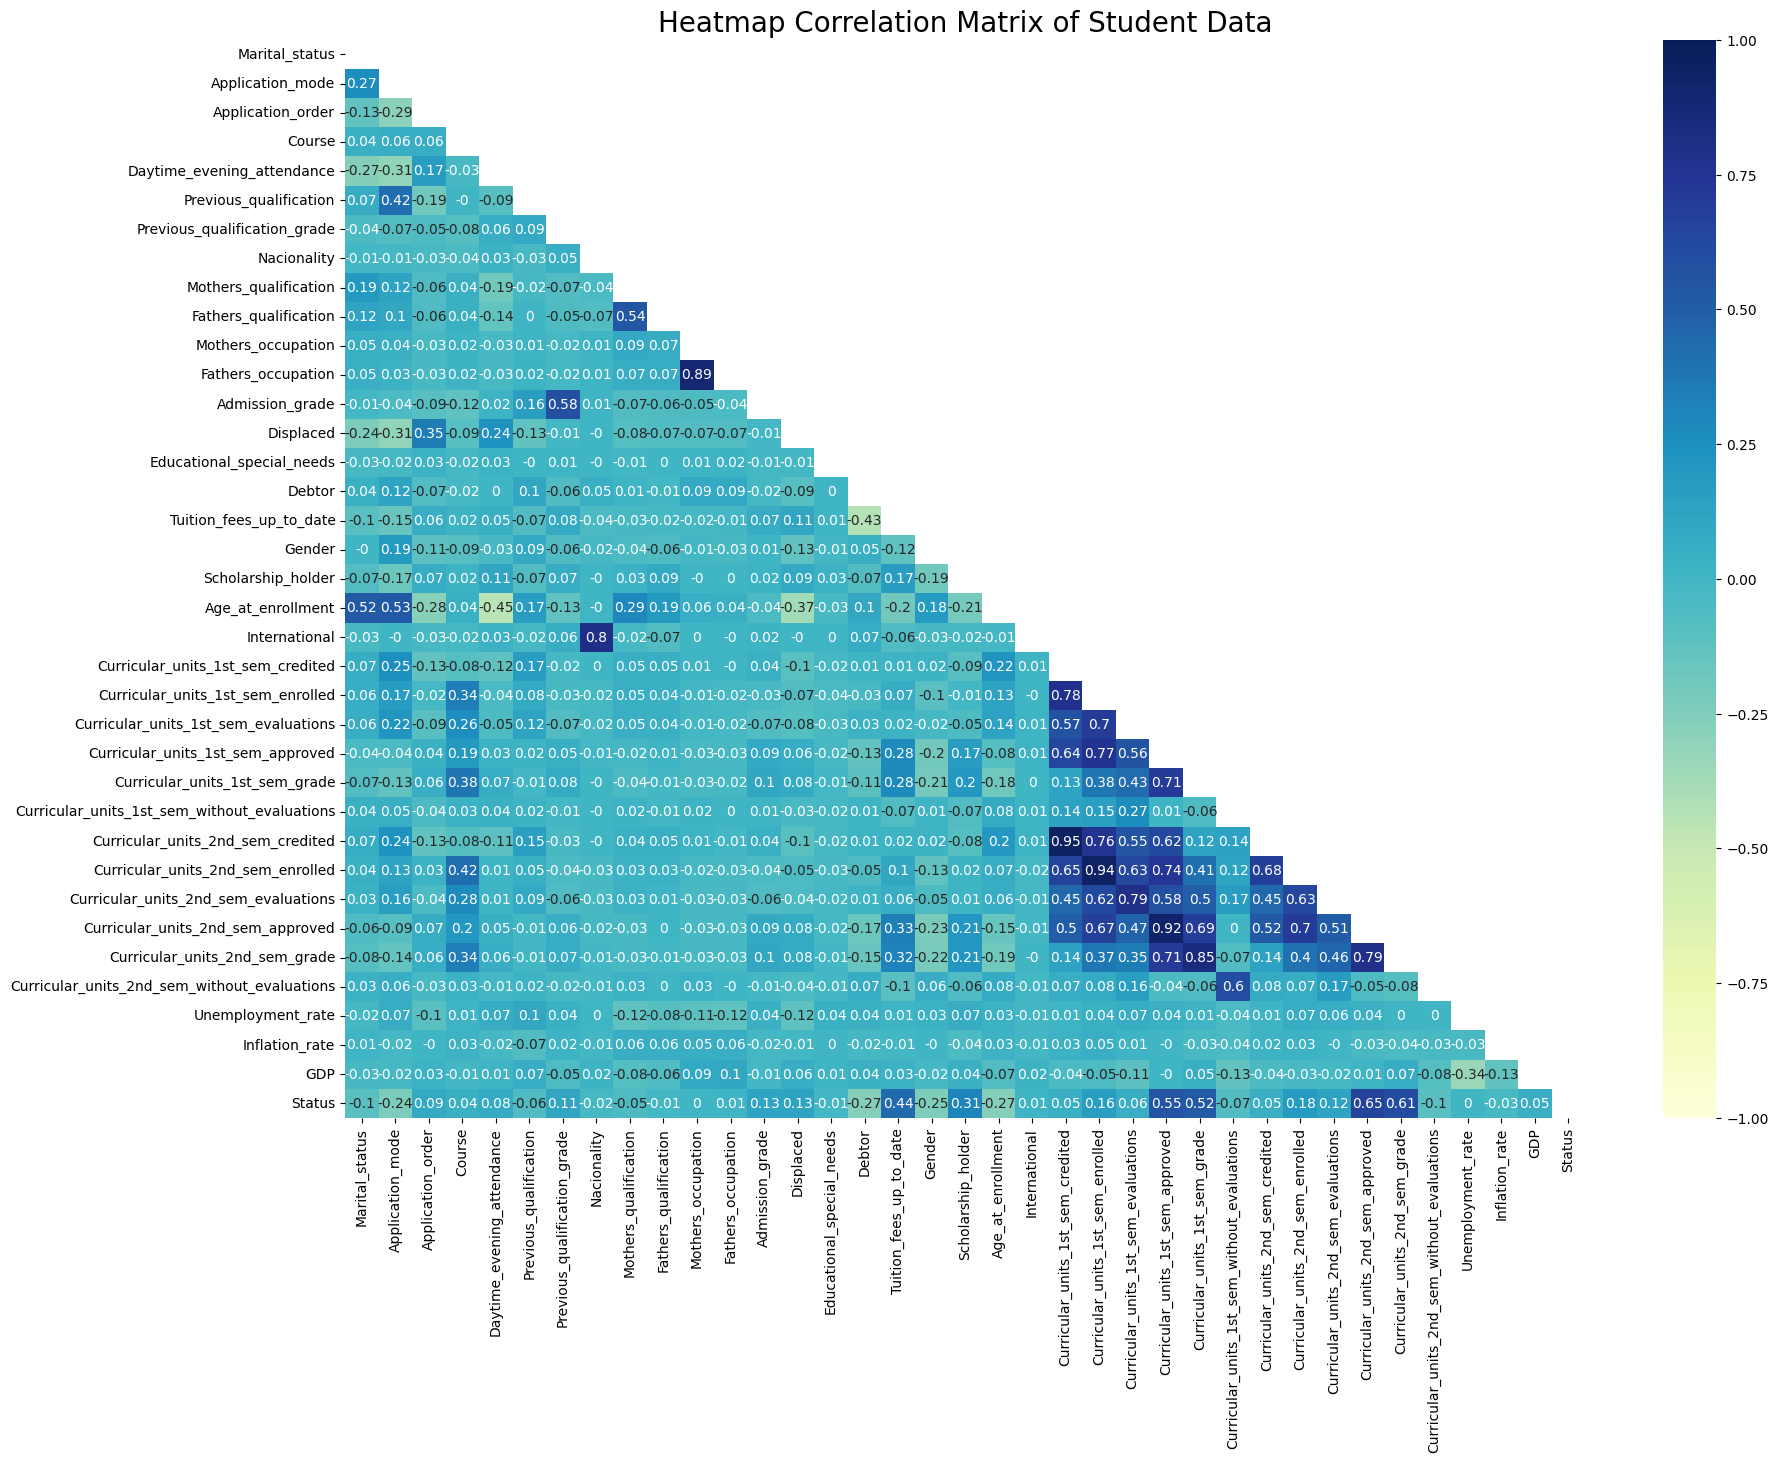

In [18]:
plt.figure(figsize=(20, 14))
correlation_matrix = df.corr(numeric_only=True).round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1,annot=True, cmap='YlGnBu', mask=mask)
plt.title('Heatmap Correlation Matrix of Student Data', size=20)
plt.show()

**Insight :**

Berdasarkan plot grafik yang didapat, ditangkap hasil pengaruh fitur terhadap Status dengan rincian sebagai berikut.
1. Fitur dengan pengaruh cukup kuat:
    - Curricular_units_2nd_sem_approved
    - Curricular_units_2nd_sem_grade
2. Fitur dengan pengaruh sedang:
    - Curricular_units_1nd_sem_approved
    - Curricular_units_1nd_sem_grade
    - Tuition_fees_up_to_date
    - Scholarship_holder
3. Fitur dengan pengaruh rendah:
    - Age_at_enrollment
    - Debtor
    - Gender
    - Applicatoin_mode
4. Fitur lainnya memiliki pengaruh yang sangat lemah terhadap Status.

Dalam feature selection, dilakukan drop semua fitur data yang memiliki nilai korelasi absolut kurang dari 0,1.

In [19]:
df_filtered = df.loc[:, df.corr()['Status'].abs().ge(0.1)]
df_filtered
df_filtered.to_csv('data_filtered.csv', index=False)

### Spliiting dan Normalisasi

Tahap ini dilakukan pemisahan fitur dari fitur target Status untuk membedakan input dan output model. Data kemudian dibagi menjadi train dan test set (80:20) dengan stratified sampling agar distribusi kelas tetap seimbang. Setelah itu, normalisasi dilakukan menggunakan MinMaxScaler untuk menyamakan skala fitur ke rentang 0–1, sehingga model tidak bias terhadap fitur dengan nilai besar.

In [20]:
x=df_filtered.drop(columns='Status')
y=df_filtered['Status']

# Splitting data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

# Standarisasi menggunakan Min Max Scaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Modeling

Tahap ini adalah tahap pemodelan yang dilakukan dengan menggunakan algoritma k-Nearest Neighbors dan Random Forest. Untuk mengoptimalkan performa algoritma, digunakan library Optuna yang menerapkan Tree-structured Parzen Estimator (TPE) dalam proses pencarian hyperparameter (hyperparameter tuning).

### k-Nearest Neighbors Modelling dengan Hyperparameter Tuning menggunakan Optuna

In [21]:
def objective_knn(trial):
    params = {
        'n_neighbors': trial.suggest_int('n_neighbors', 3, 10),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'p': trial.suggest_int('p', 1, 2) 
    }
    
    model = KNeighborsClassifier(**params)
    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)
    score = balanced_accuracy_score(y_test, y_pred_test)
    return score

study_knn = optuna.create_study(direction='maximize', sampler=TPESampler(seed=13))
study_knn.optimize(objective_knn, n_trials=10)

print("Best KNN Parameters:", study_knn.best_params)

modelKNN = KNeighborsClassifier(**study_knn.best_params)

[I 2025-06-23 14:34:32,136] A new study created in memory with name: no-name-9868ee3f-c5c1-424f-b56f-7c56fc4f135f
[I 2025-06-23 14:34:34,267] Trial 0 finished with value: 0.7979255624243197 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 0.7979255624243197.
[I 2025-06-23 14:34:34,328] Trial 1 finished with value: 0.7903814288445605 and parameters: {'n_neighbors': 10, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 0.7979255624243197.
[I 2025-06-23 14:34:34,377] Trial 2 finished with value: 0.8355267350710598 and parameters: {'n_neighbors': 8, 'weights': 'uniform', 'p': 1}. Best is trial 2 with value: 0.8355267350710598.
[I 2025-06-23 14:34:34,425] Trial 3 finished with value: 0.7842314065387802 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'p': 2}. Best is trial 2 with value: 0.8355267350710598.
[I 2025-06-23 14:34:34,461] Trial 4 finished with value: 0.8126394111273978 and parameters: {'n_neighbors': 5, 'weights': '

Best KNN Parameters: {'n_neighbors': 8, 'weights': 'uniform', 'p': 1}


### Random Forest Modelling dengan Hyperparameter Tuning menggunakan Optuna

In [22]:
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
    }
    
    model = RandomForestClassifier(**params, random_state=13)
    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)
    score = balanced_accuracy_score(y_test, y_pred_test)
    return score

study_rf = optuna.create_study(direction='maximize', sampler=TPESampler(seed=13))
study_rf.optimize(objective_rf, n_trials=10)

print("Best Random Forest Parameters:", study_rf.best_params)
modelRF = RandomForestClassifier(**study_rf.best_params, random_state=13)

[I 2025-06-23 14:34:34,688] A new study created in memory with name: no-name-d072568b-2a16-4a37-b741-c420a3721af0
[I 2025-06-23 14:34:35,253] Trial 0 finished with value: 0.8907255751704799 and parameters: {'n_estimators': 245, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.8907255751704799.
[I 2025-06-23 14:34:35,622] Trial 1 finished with value: 0.8730004461156077 and parameters: {'n_estimators': 231, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.8907255751704799.
[I 2025-06-23 14:34:35,798] Trial 2 finished with value: 0.8924861385507616 and parameters: {'n_estimators': 52, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False}. Best is trial 2 with value: 0.8924861385507616.
[I 2025-06-23 14:34:36,217] Trial 3 finished with value: 0.8747610094958893 

Best Random Forest Parameters: {'n_estimators': 52, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False}


## Evaluation

### Pendefinisian Fungsi 

Dibuat sebuah fungsi evaluasi dan visualisasi performa dari model agar dapat digunakan berulang kali tanpa perlu melakukan pengkodean ulang untuk setiap model.

In [23]:
def evaluasi_model(judul, model, X_train, y_train, X_test, y_test, save_dir="Hasil Pemodelan"):
    print(f"Evaluasi Model: {judul}")
    
    # Training model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    bal_acc = balanced_accuracy_score(y_test, y_pred)

    # Hitung skor probabilitas jika tersedia
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        y_score = None  # Tidak ada probabilitas

    # Tampilkan hasil evaluasi
    print(f"Accuracy               : {acc:.4f}")
    print(f"F1 Score (Macro)       : {f1:.4f}")
    print(f"Balanced Accuracy      : {bal_acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred 0', 'Pred 1'],
                yticklabels=['True 0', 'True 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

    # Simpan model
    os.makedirs(save_dir, exist_ok=True)
    file_name = f"{judul.replace(' ', '_')}.pkl"
    model_path = os.path.join(save_dir, file_name)
    
    with open(model_path, 'wb') as f:
        pickle.dump(model, f)
    
    print(f"Model berhasil disimpan di '{model_path}'")

    # Return ringkasan hasil
    return {
        "Skenario": judul,
        "Accuracy": acc,
        "F1 Score (Macro)": f1,
        "Balanced Accuracy": bal_acc,
        "Model Path": model_path
    }

#### 1. Evaluasi Model KNN

Evaluasi Model: Model KNN
Accuracy               : 0.8595
F1 Score (Macro)       : 0.8464
Balanced Accuracy      : 0.8355

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.80       284
           1       0.84      0.95      0.89       442

    accuracy                           0.86       726
   macro avg       0.87      0.84      0.85       726
weighted avg       0.86      0.86      0.86       726



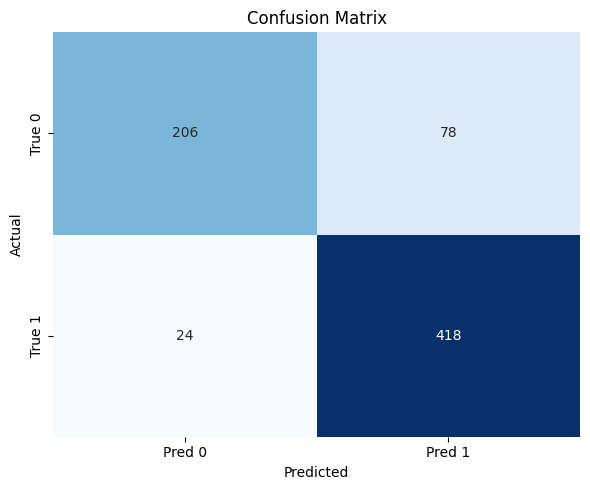

Model berhasil disimpan di 'Hasil Pemodelan\Model_KNN.pkl'


In [24]:
hasil1 = evaluasi_model("Model KNN", modelKNN, x_train, y_train, x_test, y_test)

#### 2. Evaluasi Model Random Forest

Evaluasi Model: Model Random Forest
Accuracy               : 0.9105
F1 Score (Macro)       : 0.9030
Balanced Accuracy      : 0.8925

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.81      0.88       284
           1       0.89      0.98      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726



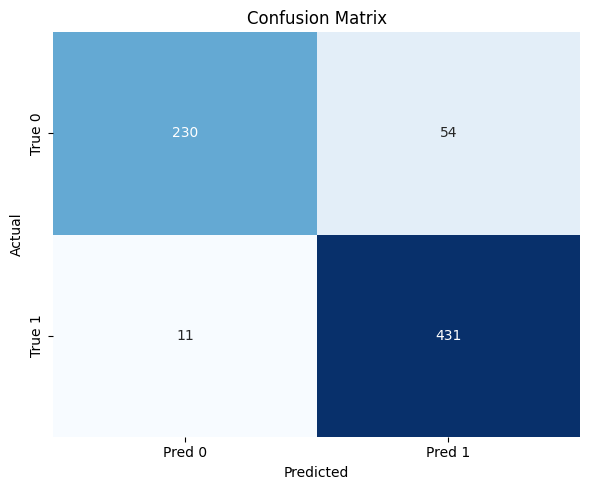

Model berhasil disimpan di 'Hasil Pemodelan\Model_Random_Forest.pkl'


In [25]:
hasil2 = evaluasi_model("Model Random Forest",modelRF, x_train, y_train, x_test, y_test)

### Perbandingan evaluasi model

In [26]:
df_hasil = pd.DataFrame([hasil1, hasil2])
df_hasil

,Skenario,Accuracy,F1 Score (Macro),Balanced Accuracy,Model Path
0,Model KNN,0.859504,0.846407,0.835527,Hasil Pemodelan\Model_KNN.pkl
1,Model Random Forest,0.910468,0.903036,0.892486,Hasil Pemodelan\Model_Random_Forest.pkl


**Insight :** </br>
Dari hasil tuning menggunakan Optuna, diperoleh hyperparameter terbaik untuk masing-masing model sebagai berikut:

KNN: {'n_neighbors': 8, 'weights': 'uniform', 'p': 1}

Random Forest: {'n_estimators': 52, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False}

Hasil pelatihan menunjukkan bahwa model yang dibangun cukup baik dengan akurasi KNN 85,95% dan Random Forest 91,05%. Namun, jika dilihat dari metrik F1-Score Macro dan Balanced Accuracy yang lebih relevan untuk dataset dengan distribusi kelas tidak seimbang, model Random Forest menunjukkan performa yang lebih baik dibanding KNN. Ini mengindikasikan bahwa Random Forest lebih unggul dalam mengklasifikasikan seluruh kelas secara menyeluruh.

Untuk keperluan interpretasi model Random Forest, kode ini digunakan untuk melihat kontribusi setiap fitur terhadap prediksi menggunakan SHAP. Plot yang dihasilkan membantu mengidentifikasi fitur paling berpengaruh, serta bagaimana nilai fitur tinggi atau rendah mendorong model memprediksi kelas tertentu. Ini berguna untuk menjelaskan keputusan model dan meningkatkan transparansi.

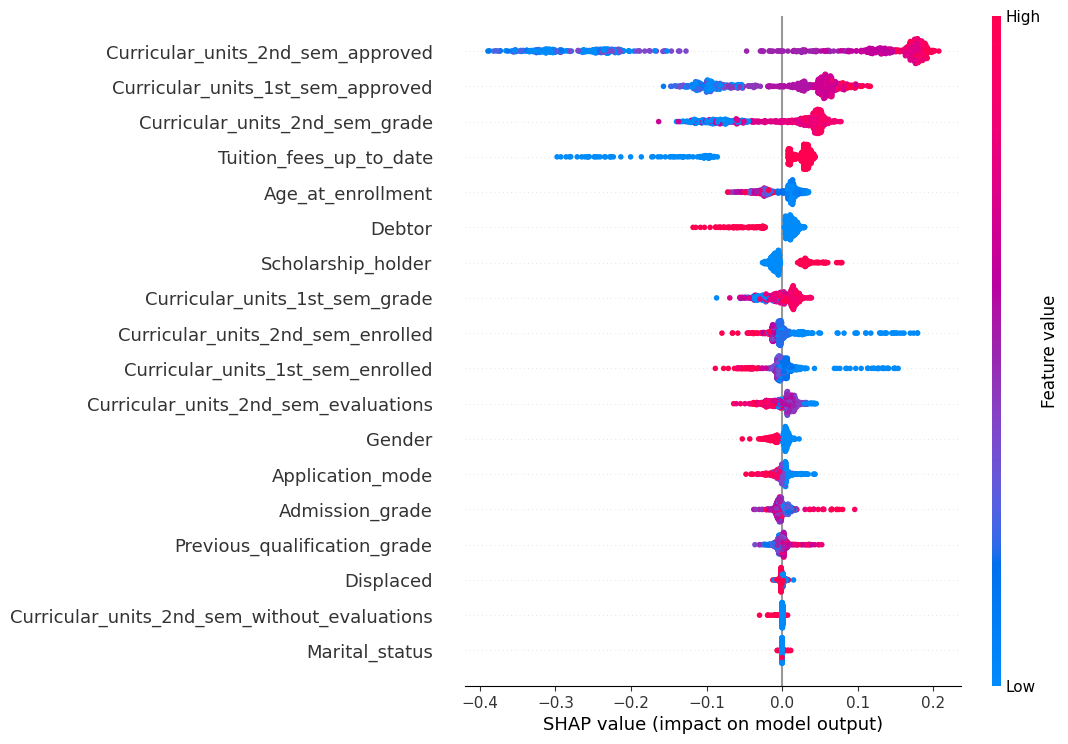

In [27]:
explainer = shap.Explainer(modelRF, x_train)     
shap_values = explainer(x_test)                  

shap.plots.beeswarm(shap_values[:, :, 1], max_display=20)

# Simpan ke file PNG
plt.savefig("shap_plot.png", bbox_inches='tight')
plt.close()

**Insight :** </br>
Plot ini menggambarkan pengaruh masing-masing fitur terhadap prediksi model menggunakan nilai SHAP (SHapley Additive exPlanations), yang menunjukkan seberapa besar pengaruh masing-masing fitur terhadap probabilitas seorang mahasiswa **dropout (kelas 0)** pada model Random Forest. `shap_values[0]` berarti ini untuk **kelas 0** → yaitu **mahasiswa yang dropout**. 

  * SHAP value positif → mendorong ke dropout
  * SHAP value negatif → mendorong ke tidak dropout 

### Fitur Paling Berpengaruh terhadap Prediksi **Dropout**

1. **Curricular\_units\_2nd\_sem\_approved**

   * Mahasiswa yang **meluluskan banyak mata kuliah semester 2** (warna merah) → SHAP value **negatif** → **cenderung tidak dropout**.
   * Yang lulus sedikit (biru) → SHAP value **positif** → **cenderung dropout**.

2. **Curricular\_units\_1st\_sem\_approved**

   * Banyak mata kuliah yang disetujui di semester 1 → **menurunkan kemungkinan dropout**.
   * Sedikit yang disetujui → **meningkatkan kemungkinan dropout**.

3. **Curricular\_units\_2nd\_sem\_grade**

   * Nilai tinggi di semester 2 (merah) → **mendorong bertahan**.
   * Nilai rendah (biru) → **mendorong dropout**.

4. **Tuition\_fees\_up\_to\_date**

   * Mahasiswa dengan **pembayaran lancar** (merah) → **tidak dropout**.
   * Yang **menunggak** (biru) → **lebih berisiko dropout**.

5. **Curricular\_units\_1st\_sem\_grade**

   * Nilai tinggi semester 1 → **menurunkan risiko dropout**.
   * Nilai rendah → meningkatkan risiko.


#### Fitur Sosial-Ekonomi & Demografi

6. **Age\_at\_enrollment**

   * Mahasiswa yang masuk pada usia **lebih tua** (merah) → sedikit lebih **rentan dropout**.
   * Usia muda (biru) → cenderung bertahan.

7. **Scholarship\_holder**

   * Penerima beasiswa (merah) → SHAP negatif → **lebih aman dari dropout**.
   * Tanpa beasiswa (biru) → lebih berisiko dropout.

8. **Debtor**

   * Mahasiswa dengan utang (merah) → **lebih cenderung dropout**.
   * Tanpa utang (biru) → lebih aman.

9. **Curricular\_units\_2nd\_sem\_evaluations**

   * Mahasiswa yang **tidak banyak mengikuti evaluasi** semester 2 → lebih berisiko dropout.
   * Lebih banyak evaluasi → cenderung bertahan.

10. **Curricular\_units\_2nd\_sem\_enrolled**

    * Mahasiswa yang mendaftar lebih sedikit mata kuliah semester 2 (biru) → **lebih berisiko dropout**.

**Kesimpulan Umum:** </br>
Model mengindikasikan bahwa potensi mahasiswa untuk mengalami dropout sangat dipengaruhi oleh kinerja akademik di tahap awal studi, dukungan keuangan, serta kondisi sosial ekonomi:
- Mahasiswa dengan prestasi akademik rendah, jumlah mata kuliah tidak lulus yang tinggi, serta tunggakan pembayaran biaya pendidikan cenderung memiliki risiko dropout yang lebih besar.
- Adanya bantuan finansial seperti beasiswa, pencapaian akademik awal yang baik, dan partisipasi aktif dalam evaluasi per semester berperan penting dalam mengurangi kemungkinan dropout.
- Meskipun pengaruhnya relatif kecil, usia yang lebih tua dan jenis kelamin laki-laki juga ditemukan sedikit meningkatkan kecenderungan mahasiswa untuk dropout.

In [28]:
!pip freeze > requirements.txt